Tilte: Seattle AirBnB_1

Author: Kazutoki Matsui

## Inspiration

### 1. Can you describe the vibe of each Seattle neighborhood using listing descriptions?
### 2. What are the busiest times of the year to visit Seattle? By how much do prices spike?
### 3. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

In [1]:
## Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium

%matplotlib inline

In [8]:
listings = pd.read_csv('./data/listings.csv')
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [2]:
calendar = pd.read_csv('./data/calendar.csv')
calendar.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Converting string 'price' to numeric

In [4]:
calendar = pd.read_csv('./data/calendar.csv')
# calendar = calendar[calendar['price'].notna()]
'''Convert string price into numerics'''
calendar['price'] = calendar['price'].fillna('$0')
calendar['price'] = calendar['price'].apply(lambda x: x.replace("$", ""))
calendar['price'] = calendar['price'].apply(lambda x: x.replace(",", ""))
calendar['price'] = pd.to_numeric(calendar['price'])

'''Create a column called occupied'''
occupied = []
for row in calendar['available']:
    if row == 't':
        occupied.append(0)
    elif row == 'f':
        occupied.append(1)
calendar['occupied'] = occupied

'''Convert availability into boolean values'''
avail = []
for row in calendar['available']:
    if row == 't':
        avail.append(True)
    elif row == 'f':
        avail.append(False)
calendar['available'] = avail

'''Convert object to datetime.date object'''
calendar['date'] = calendar['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

'''Create a weekday column corresponding the weekday of the date'''
weekday = {'Mon': 0, 'Tue':1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat':5, 'Sun': 6}

calendar['weekday'] = calendar['date'].apply(lambda x: x.weekday())
calendar['weekday'] = calendar['weekday'].apply(lambda x: list(weekday.keys())[list(weekday.values()).index(x)])

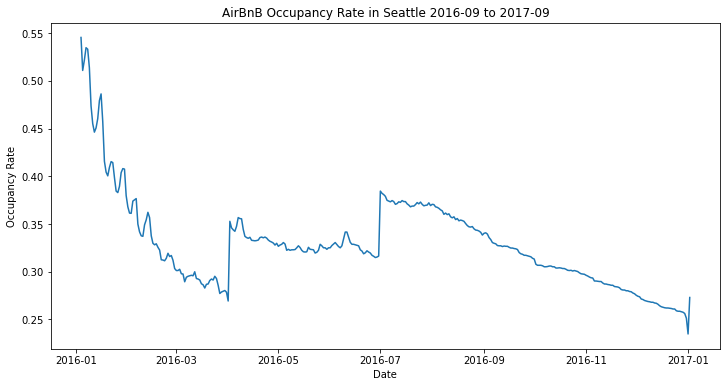

In [5]:
## Check the occupancy rate
plt.figure(figsize=(12,6))
plt.plot(calendar.groupby('date').mean()['occupied'])
plt.title('AirBnB Occupancy Rate in Seattle 2016-09 to 2017-09')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()

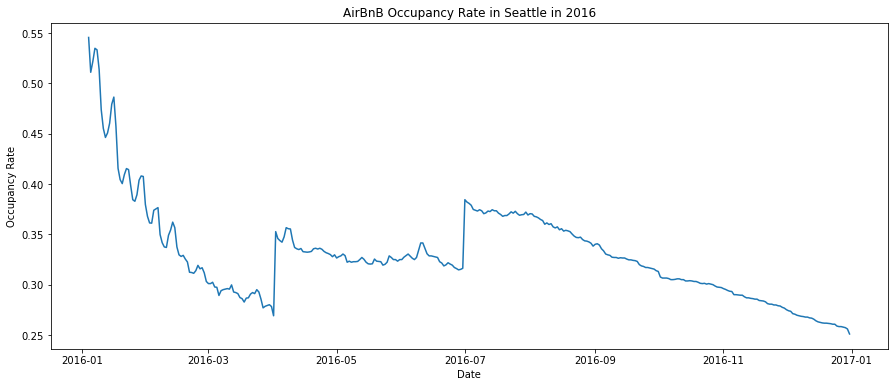

In [6]:
in_2016 = calendar[calendar['date'].apply(lambda x: str(x)) <= '2016-12-31']
plt.figure(figsize=(15,6))
plt.plot(in_2016.groupby('date').mean()['occupied'])
plt.title('AirBnB Occupancy Rate in Seattle in 2016')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()

In [42]:
weekday = {'Mon': 0, 'Tue':1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat':5, 'Sun': 6}
week_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

calendar['weekday'] = calendar['date'].apply(lambda x: x.weekday())
calendar['weekday'] = calendar['weekday'].apply(lambda x: list(weekday.keys())[list(weekday.values()).index(x)])
available = calendar[calendar['available']==True]
available.groupby(by=['date','weekday']).mean()['price'][:30]

date        weekday
2016-01-04  Mon        122.085879
2016-01-05  Tue        120.681307
2016-01-06  Wed        120.928258
2016-01-07  Thu        120.958896
2016-01-08  Fri        127.640853
2016-01-09  Sat        127.330819
2016-01-10  Sun        120.001991
2016-01-11  Mon        118.988942
2016-01-12  Tue        118.720908
2016-01-13  Wed        118.680019
2016-01-14  Thu        118.930583
2016-01-15  Fri        127.609155
2016-01-16  Sat        128.339113
2016-01-17  Sun        122.727317
2016-01-18  Mon        121.740475
2016-01-19  Tue        119.301671
2016-01-20  Wed        118.683705
2016-01-21  Thu        119.488692
2016-01-22  Fri        126.760753
2016-01-23  Sat        127.000894
2016-01-24  Sun        120.288763
2016-01-25  Mon        118.232766
2016-01-26  Tue        117.737691
2016-01-27  Wed        118.148863
2016-01-28  Thu        117.685413
2016-01-29  Fri        124.600000
2016-01-30  Sat        124.936782
2016-01-31  Sun        119.159628
2016-02-01  Mon        119.9

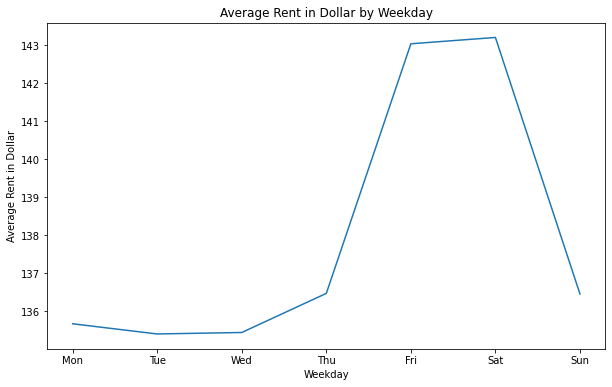

In [78]:
by_weekly = available.groupby(by=['weekday']).mean()['price'].sort_values()
by_weekly = by_weekly.to_dict()
by_weekly = {k: by_weekly[k] for k in week_list if k in by_weekly}
by_weekly = pd.DataFrame({'day': list(by_weekly.keys()),  'average': list(by_weekly.values())})

plt.figure(figsize=(10,6))
plt.plot(by_weekly['day'], by_weekly['average'])
plt.title('Average Rent in Dollar by Weekday')
plt.ylabel('Average Rent in Dollar')
plt.xlabel('Weekday')
plt.show()

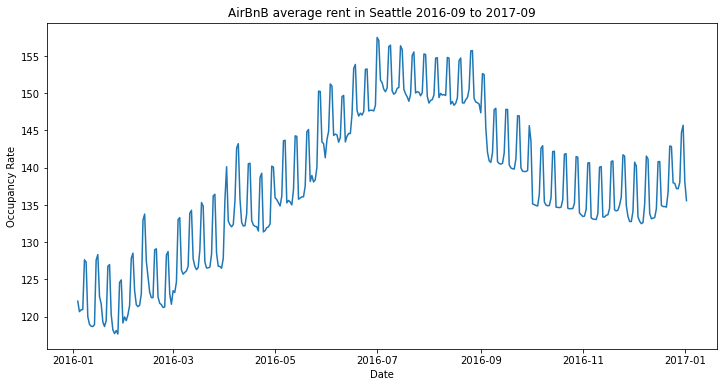

In [8]:
## Check the average price for available listings
available = calendar[calendar['available']==True]
plt.figure(figsize=(12,6))
plt.plot(available.groupby('date').mean()['price'])
plt.title('AirBnB average rent in Seattle 2016-09 to 2017-09')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()

## Data Exploring in the listings dataset

In [31]:
# listings = listings.rename(columns={"id": "listing_id"})

In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [47]:
listings = pd.read_csv('./data/listings.csv')
listings['price'] = listings['price'].apply(lambda x: x.replace("$", ""))
listings['price'] = listings['price'].apply(lambda x: x.replace(",", ""))
listings['price'] = pd.to_numeric(listings['price'])
listings.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [16]:
# from scipy import stats
# listings = listings[(np.abs(stats.zscore(listings[['price']])) < 3).all(axis=1)]
# listings['price'].describe()

count    3737.000000
mean      119.405941
std        66.118687
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       395.000000
Name: price, dtype: float64

C:\Users\81801\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


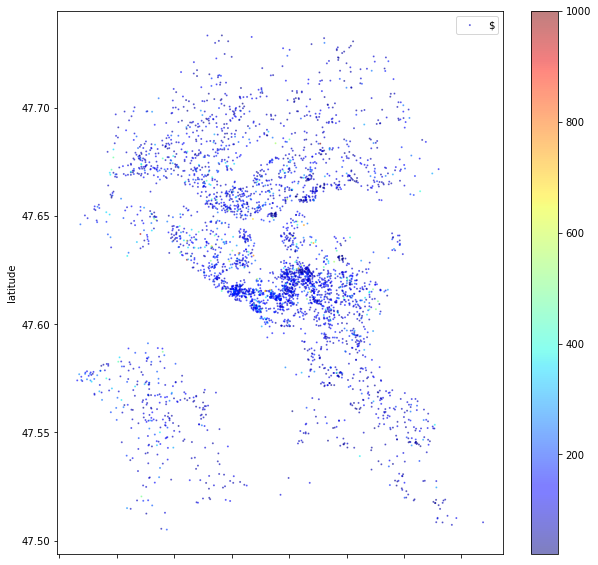

In [35]:
listings.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
         s=1, label='$',  
         c=listings['price'],   #  set symbol color on house value 
         cmap=plt.get_cmap('jet'),      
         colorbar=True,
         figsize=(10,10))
plt.legend()

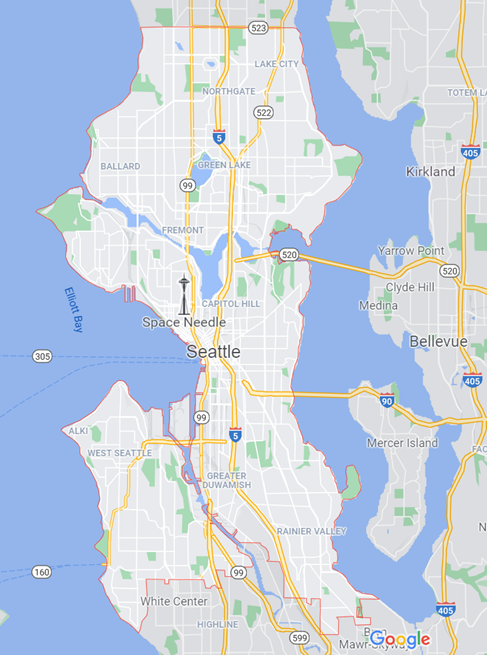
Credit: Google Map (https://www.google.co.jp/maps/place/Seattle,+WA/@47.6465859,-122.3398333,11.27z/data=!4m5!3m4!1s0x5490102c93e83355:0x102565466944d59a!8m2!3d47.6062095!4d-122.3320708)

In [ ]:
## Creating a map, credit: https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94
# from folium.plugins import HeatMap
sub_map = listings[["latitude", "longitude", "id"]]

map = folium.Map(location=[sub_map.latitude.mean(),
                           sub_map.longitude.mean()],
                 zoom_start=12, control_scale=True)

for index, location_info in sub_map.iterrows():
    folium.CircleMarker([location_info["latitude"], location_info["longitude"]],
                        popup=location_info["id"], radius=1).add_to(map)

# HeatMap(sub_map).add_to(map)
map

In [18]:
## Drop all NaN columns
listings = listings.drop(columns=['license','jurisdiction_names','has_availability','neighbourhood_group_cleansed'], axis=1)

SyntaxError: invalid syntax (Temp/ipykernel_19932/1176578835.py, line 1)

## Reviews

In [24]:
reviews = pd.read_csv('./data/reviews.csv')
reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...